In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = (10,6)

# Import data

In [5]:
data = datasets.load_iris()

X = pd.DataFrame(data["data"])
X.columns = data["feature_names"]
y = pd.Series(data["target"], name="target").astype("category")
y.cat.categories = data["target_names"]

# Supervised learning

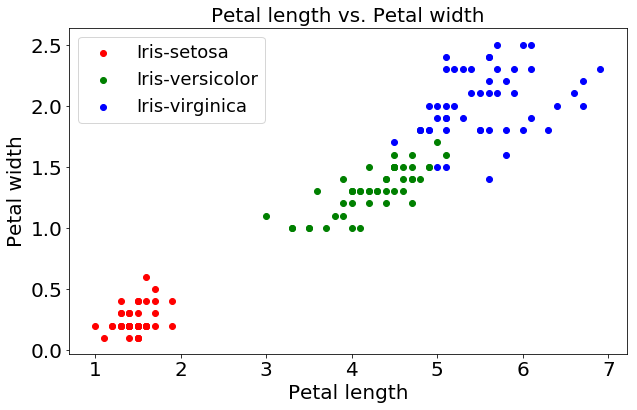

In [8]:
plt.scatter(data.iloc[:50, 2], data.iloc[:50, 3], c='r', label='Iris-setosa')
plt.scatter(data.iloc[50:100, 2], data.iloc[50:100, 3], c='g',label='Iris-versicolor')
plt.scatter(data.iloc[100:, 2], data.iloc[100:, 3], c='b',label='Iris-virginica')

plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Petal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Petal length vs. Petal width',fontsize=20)
plt.legend(prop={'size': 18})
plt.show()

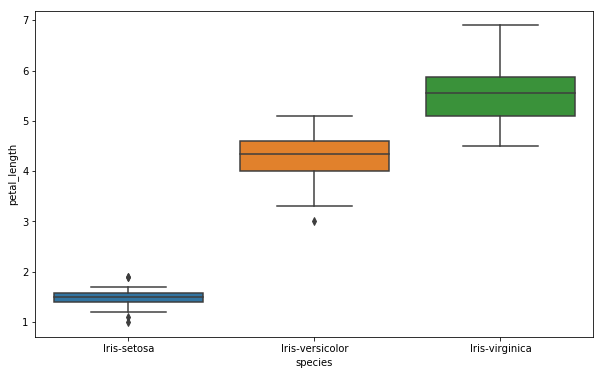

In [4]:
sns.boxplot(x = "species", y = "petal_length", data=data)
plt.show()

## Example 1: Species Classification - Random Forest

In [22]:
y = data.species
X = data.drop("species", axis=1)
print(X.head())
feature_list = list(X.columns)

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


(105, 4)
Accuracy: 1.0
Confusion matrix: 
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


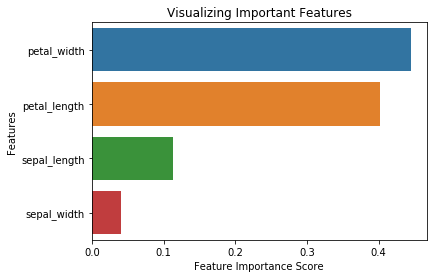

In [23]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

rf=RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Confusion matrix: \n",metrics.confusion_matrix(y_test, y_pred))

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)
# print("Most important features : \n",feature_imp)

%matplotlib inline
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### KNN

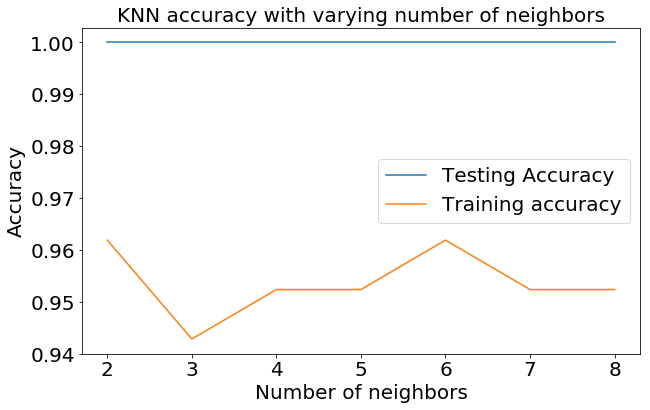

In [24]:
from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(2,9)
train_accuracy = np.zeros(len(neighbors))
test_accuracy = np.zeros(len(neighbors))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)
    
plt.figure(figsize=(10,6))
plt.title('KNN accuracy with varying number of neighbors',fontsize=20)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend(prop={'size': 20})
plt.xlabel('Number of neighbors',fontsize=20)
plt.ylabel('Accuracy',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
test_accuracy = knn.score(X_test, y_test)

prediction = knn.predict(X_test)

results = pd.concat([y_test.reset_index().drop("index",axis=1), pd.Series(prediction)], axis=1)
results.columns = ["Real", "Predicted"]
results.head(10)

,Real,Predicted
0,Iris-versicolor,Iris-versicolor
1,Iris-setosa,Iris-setosa
2,Iris-virginica,Iris-virginica
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor
5,Iris-setosa,Iris-setosa
6,Iris-versicolor,Iris-versicolor
7,Iris-virginica,Iris-virginica
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


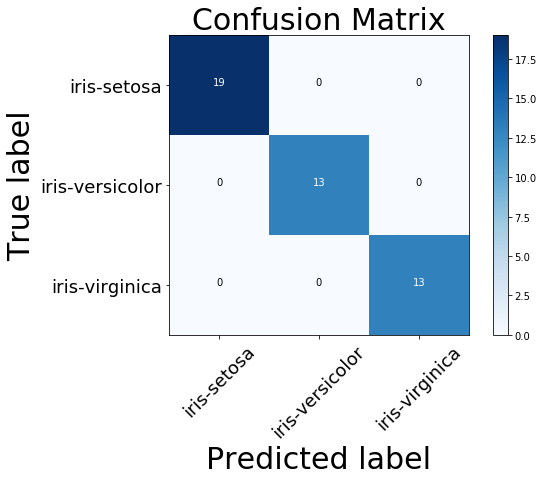

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

    avg / total       1.00      1.00      1.00        45



In [36]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label',fontsize=30)
    plt.xlabel('Predicted label',fontsize=30)
    plt.tight_layout()
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)

cnf_matrix = confusion_matrix(y_test, prediction)
np.set_printoptions(precision=2)
plt.figure(figsize=(8,6))
plot_confusion_matrix(cnf_matrix, classes=["iris-setosa", "iris-versicolor", "iris-virginica"])
plt.title('Confusion Matrix',fontsize=30)
plt.show()

from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

In [26]:
new_point = [[6.5, 3.0, 3.1, 0.8],
             [6.5,3.0, 2.5,0.7],
            [ 6.5,3.0,6.0,1.0],
            [6.5, 3.0, 1.0, 0.5],
            [6.5, 3.0, 7.0, 2.5]]
new_value = pd.DataFrame(new_point)
new_value.columns = X_test.columns
new_value

,sepal_length,sepal_width,petal_length,petal_width
0,6.5,3.0,3.1,0.8
1,6.5,3.0,2.5,0.7
2,6.5,3.0,6.0,1.0
3,6.5,3.0,1.0,0.5
4,6.5,3.0,7.0,2.5


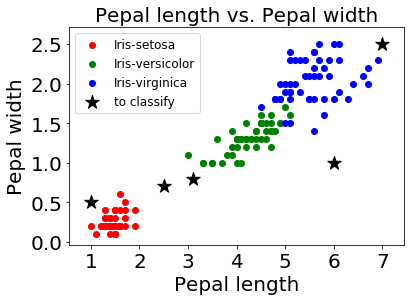

In [27]:
plt.scatter(data.iloc[:50, 2], data.iloc[:50, 3], c='r', label='Iris-setosa')
plt.scatter(data.iloc[50:100, 2], data.iloc[50:100, 3], c='g',label='Iris-versicolor')
plt.scatter(data.iloc[100:, 2], data.iloc[100:, 3], c='b',label='Iris-virginica')

plt.scatter(new_value.iloc[:,2], new_value.iloc[:,3], c="k", marker = "*", label = "to classify", s=200)

plt.xlabel('Pepal length',fontsize=20)
plt.ylabel('Pepal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Pepal length vs. Pepal width',fontsize=20)
plt.legend(prop={'size': 12})
plt.show()

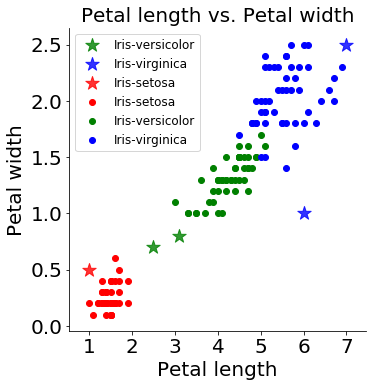

In [28]:
predict_label = knn.predict(new_value)

new_value = pd.concat([new_value, pd.Series(predict_label)], axis=1)
new_value.columns = list(X.columns) + ["species"]

#plt.scatter(new_value.iloc[:,2], new_value.iloc[:,3], c="k", marker = "*", label = "to classify")
sns.lmplot("petal_length", "petal_width", data=new_value, hue="species", fit_reg=False,
           markers="*", 
           scatter_kws={"s": 200},
          palette={"Iris-setosa":"red", "Iris-virginica":"blue", "Iris-versicolor":"green"},
          legend=False)

plt.scatter(data.iloc[:50, 2], data.iloc[:50, 3], c='r', label='Iris-setosa')
plt.scatter(data.iloc[50:100, 2], data.iloc[50:100, 3], c='g',label='Iris-versicolor')
plt.scatter(data.iloc[100:, 2], data.iloc[100:, 3], c='b',label='Iris-virginica')

plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Petal width',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Petal length vs. Petal width',fontsize=20)
plt.legend(prop={'size': 12})
plt.show()

## Example 2: Sepal Length prediction 

### Linear regression 

In [13]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, mean_absolute_error, roc_auc_score

def diagnose_regression_model(model, X_train, y_train, X_test, y_test):
    """
    
    """
    test_preds = model.predict(X_test)
    train_preds = model.predict(X_train)
    
    print("Train R² = {:.3f}".format(model.score(X_train, y_train)))
    print("Test R² = {:.3f}\n".format(model.score(X_test, y_test))) 
    
    print("Train RMSE = {:.3f}".format(np.sqrt(mean_squared_error(y_train, train_preds))))
    print("Test RMSE = {:.3f}\n".format(np.sqrt(mean_squared_error(y_test, test_preds))))    
    
    print("Train MAE = {:.3f}".format(mean_absolute_error(y_train, train_preds)))
    print("Test MAE = {:.3f}".format(mean_absolute_error(y_test, test_preds))) 
    
    compare_density_function_prediction_2(y_train, train_preds, y_test, test_preds)

def compare_density_function_prediction_2(y_train, train_preds, y_test, test_preds):
    """
    Displays density curve or real and predicted values for train and test 
    """
    
    fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
    
    sns.distplot(train_preds, hist=False, color="b", label="Train Fitted" , kde_kws={"lw": 2, "linestyle": "-"}, ax=ax1)
    sns.distplot(y_train, hist=False, color="k", label="Train Actual",  kde_kws={"lw": 2, "linestyle": "-"}, ax=ax1)
    
    sns.distplot(test_preds, hist=False, color="b", label="Test Fitted" , kde_kws={"lw": 2, "linestyle": "-"}, ax=ax2)
    sns.distplot(y_test, hist=False, color="k", label="Test Actual" , kde_kws={"lw": 2, "linestyle": "-"}, ax=ax2)
    




    plt.title('Actual vs Fitted Values for Price')


    plt.show()
    plt.close()

(105, 6)
RMSE = 2.04
Accuracy: 95.76 %.
Train R² = 0.867
Test R² = 0.861

Train RMSE = 0.303
Test RMSE = 0.304

Train MAE = 0.243
Test MAE = 0.242


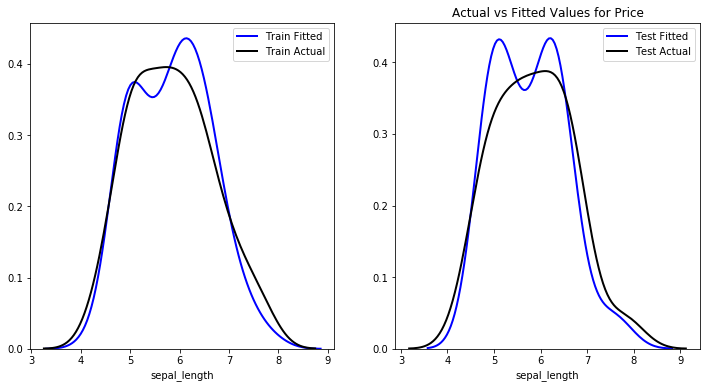

In [14]:
from sklearn.linear_model import LinearRegression

y = data.sepal_length
X = data.drop(["sepal_length"], axis=1)
X = pd.get_dummies(X)

feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


diagnose_regression_model(lr, X_train, y_train, X_test, y_test)

In [15]:
a = pd.Series(y_test).reset_index().drop("index", axis=1)
b = pd.Series(y_pred).round(2)

results = pd.concat([a, b], axis=1)
results.columns = ["sepal_length", "prediction"]
results["difference"] = results["sepal_length"] - results["prediction"]
results.head()

,sepal_length,prediction,difference
0,6.1,6.38,-0.28
1,5.7,5.36,0.34
2,7.7,7.43,0.27
3,6.0,6.11,-0.11
4,6.8,6.37,0.43


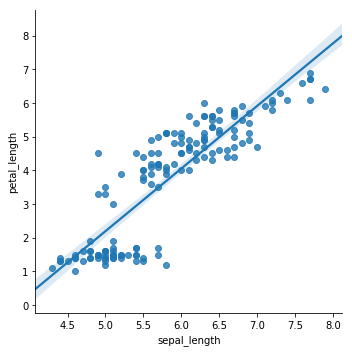

In [38]:
sns.lmplot(x = "sepal_length", y="petal_length", data=data)
plt.show()

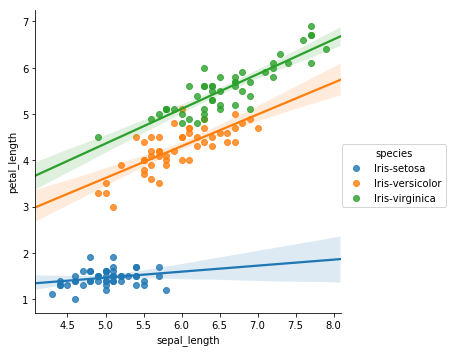

In [37]:
sns.lmplot(x = "sepal_length", y="petal_length", data=data,hue="species")
plt.show()

In [16]:
new_point = [
    [3.0, 6.0, 0.7, 0, 1, 0],
    [3.0, 3.0, 0.7, 0, 1, 0],
    [3.0, 5.0, 0.7, 0, 0, 1]
]
new_value = pd.DataFrame(new_point)
new_value.columns = X_test.columns
new_value

,sepal_width,petal_length,petal_width,species_Iris-setosa,species_Iris-versicolor,species_Iris-virginica
0,3.0,6.0,0.7,0,1,0
1,3.0,3.0,0.7,0,1,0
2,3.0,5.0,0.7,0,0,1


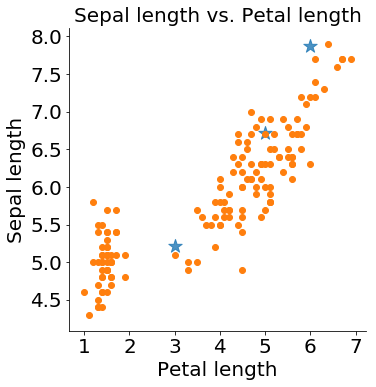

In [17]:
predict_label = lr.predict(new_value)

new_value = pd.concat([new_value, pd.Series(predict_label)], axis=1)
new_value.columns = list(X.columns) + ["sepal_length"]

#plt.scatter(new_value.iloc[:,2], new_value.iloc[:,3], c="k", marker = "*", label = "to classify")
sns.lmplot("petal_length", "sepal_length", data=new_value, fit_reg=False,
           markers="*", 
           scatter_kws={"s": 200},
          legend=False)

plt.scatter(data["petal_length"], data["sepal_length"])

plt.xlabel('Petal length',fontsize=20)
plt.ylabel('Sepal length',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.title('Sepal length vs. Petal length',fontsize=20)
plt.show()

### Random Forest Regressor

(105, 6)
Test RMSE = 1.88
Accuracy: 96.0 %.
Variable: petal_length                   Importance: 0.85
Variable: sepal_width                    Importance: 0.07
Variable: petal_width                    Importance: 0.06
Variable: species_Iris-versicolor        Importance: 0.01
Variable: species_Iris-setosa            Importance: 0.00
Variable: species_Iris-virginica         Importance: 0.00


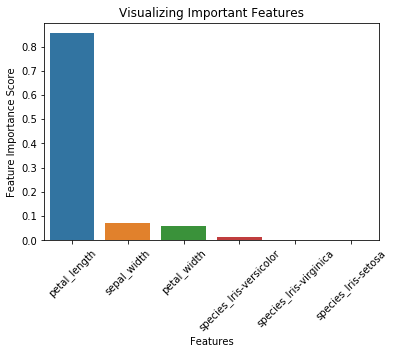

In [18]:
y = data.sepal_length
X = data.drop("sepal_length", axis=1)
# print(X.head())

X =pd.get_dummies(X)
feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('Test RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:30} Importance: {:.2f}'.format(*pair)) for pair in feature_importances];

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)

%matplotlib inline
plot = sns.barplot(y=feature_imp, x=feature_imp.index)

for x in plot.get_xticklabels():
    x.set_rotation(45)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()

(105, 3)
RMSE = 1.93
Accuracy: 95.92 %.
Variable: petal_length         Importance: 0.860
Variable: sepal_width          Importance: 0.070
Variable: petal_width          Importance: 0.060


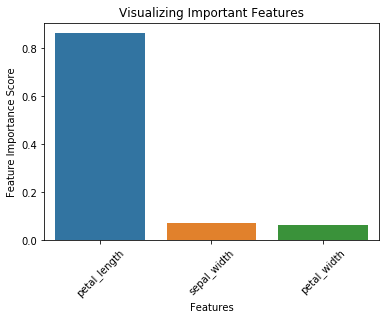

In [19]:
y = data.sepal_length
X = data.drop(["sepal_length", "species"], axis=1)

feature_list = list(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape)

rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

MSE = ((y_pred - y_test)**2).sum()

print('RMSE =', round(np.sqrt(MSE), 2))

mape = 100 * (abs(y_pred - y_test) / y_pred)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {:.3f}'.format(*pair)) for pair in feature_importances];

feature_imp = pd.Series(rf.feature_importances_, index = feature_list).sort_values(ascending=False)

%matplotlib inline
plot = sns.barplot(y=feature_imp, x=feature_imp.index)

for x in plot.get_xticklabels():
    x.set_rotation(45)

plt.ylabel('Feature Importance Score')
plt.xlabel('Features')
plt.title("Visualizing Important Features")
plt.show()